@nishiyama85さんのコード

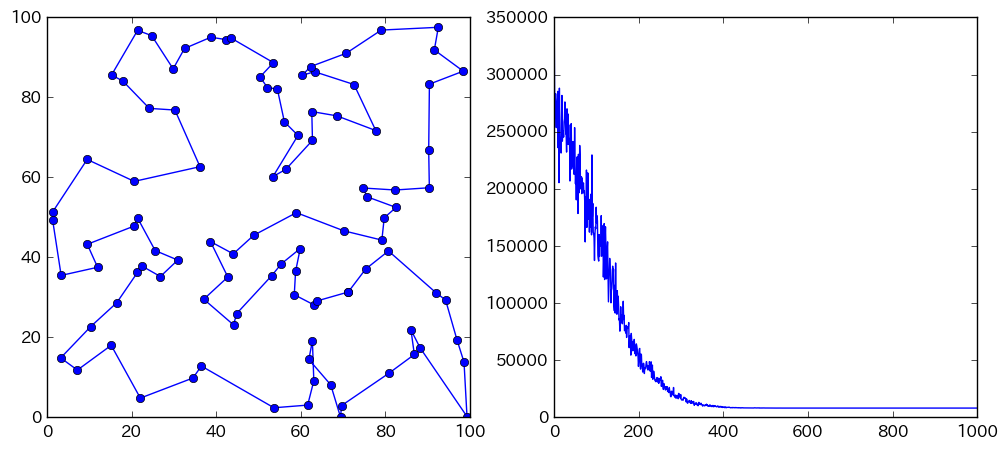

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x120e8e208>

  likely near /Users/noriakioshita/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/noriakioshita/.julia/v0.6/IJulia/src/kernel.jl:31


In [1]:
using PyPlot

const AREA_SCALE = 100
const NUM_POINTS = 100

# 頂点をランダムな位置に配置
function generate_points()
    points = zeros(NUM_POINTS, 2)
    points[:, 1] = rand(NUM_POINTS) * AREA_SCALE
    points[:, 2] = rand(NUM_POINTS) * AREA_SCALE
    points
end

# 頂点間の距離の2乗を計算
function calc_distances2(points)
    dists2 = zeros(NUM_POINTS, NUM_POINTS)
    for i = 1:NUM_POINTS
        for j = 1:NUM_POINTS
            p1 = points[i,:]
            p2 = points[j,:]
           dists2[i, j] = (p1[1] - p2[1])^2 + (p1[2] - p2[2])^2
        end
    end
    dists2
end

# パスのエネルギーを計算
function energy(path, dists2)
    e = 0
    for i = 1:NUM_POINTS
        start_point = path[i]
        end_point = (i == NUM_POINTS) ? path[1] : path[i + 1]
        e += dists2[start_point, end_point]
    end
    e
end

#  パスの初期化
function initialize_path()
    path = collect(1:NUM_POINTS)
    shuffle(path)
end

# 2-opt 法によるパスのつなぎ替え
# 指定した2つの頂点を出発する頂点をつなぎ替える
function modify_by_2opt(path, dists2, kT)
    current_energy = energy(path, dists2)
    for i = 1:NUM_POINTS - 1
        i1 = i + 1
        for j = i + 2:NUM_POINTS
            j1 = j % NUM_POINTS + 1
            if i != 1 || j1 != 1
                l1 = dists2[path[i], path[i1]]
                l2 = dists2[path[j], path[j1]]
                l3 = dists2[path[i], path[j]]
                l4 = dists2[path[i1], path[j1]]
                # エネルギー差分
                dE = (l3 + l4) - (l1 + l2)
                # 低エネルギー側へは必ず遷移。高エネルギー側へはある確率で遷移
                if dE < 0 || (r = rand(); r < exp(-dE / kT))
                    # つなぎかえる
                    new_path = path[i1:j]
                    path[i1:j] = reverse(new_path)
                    new_energy = energy(path, dists2)
                end
            end
         end
      end
    return path
end

function main()
    # アニーリングスケジュールをどう決めるか？
    
    # 頂点間の平均の距離 〜 AREA_SCALE / NUM_POINTS
    # 1辺の平均エネルギー ~ (AREA_SCALE / NUM_POINTS)^2
    # 全エネルギー 〜 NUM_POINTS * (AREA_SCALE / NUM_POINTS)^2 = AREA_SCALE^2 / NUM_POINTS

    # 最初は遷移が頻繁に起こってほしいので　(全エネルギースケール )× (頂点数) くらいの温度にしてみる（適当）
    # ~ AREA_SCALE^2 程度
    
    # イテレーションの終わりには十分冷えているようにしたい
    # kT_end ~ 1辺の平均エネルギーの100分の1程度 = (AREA_SCALE / NUM_POINTS)^2 / 100.0
    
    const END_TIME = 1000
    kT = AREA_SCALE^2
    const COOLING_RATE = ((AREA_SCALE / NUM_POINTS)^2 / (100.0 * kT))^(1.0 / END_TIME)
    # println("COOLING_RATE = $COOLING_RATE")
    
    # 頂点をランダムな位置に配置
    points = generate_points()
    
    # パスを初期化
    path = initialize_path()
    
    # 頂点間の距離を事前に計算
    dists2 = calc_distances2(points)
    
    # エネルギー確認用
    energy_history = zeros(END_TIME)
    
    for t = 1:END_TIME
        current_energy = energy(path, dists2)
        path = modify_by_2opt(path, dists2, kT)
    
        kT *= COOLING_RATE
        # println("energy = $current_energy, kT = $kT")
        energy_history[t] = current_energy
    end
    
    push!(path, path[1])
    xs = [points[i, 1] for i in path]
    ys = [points[i, 2] for i in path]
    figure(figsize=(12, 5))
    subplot(121)
    plot(xs, ys, linestyle="-", marker="o")
    subplot(122)
    plot(energy_history)

end
    
main()

In [1]:
using Plots
pyplot()

const AREA_SCALE = 100
const NUM_POINTS = 100

# 頂点をランダムな位置に配置
function generate_points()
    points = zeros(NUM_POINTS, 2)
    points[:, 1] = rand(NUM_POINTS) * AREA_SCALE
    points[:, 2] = rand(NUM_POINTS) * AREA_SCALE
    points
end

function distance(points)
    dist = zeros(NUM_POINTS, NUM_POINTS)
    for i in 1:NUM_POINTS
        for j in 1:NUM_POINTS
            p1 = points[i,:]
            p2 = points[j,:]
            dist = sqrt(p1^2 + p2^2)
        end
    end
end

  likely near /Users/noriakioshita/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/noriakioshita/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/noriakioshita/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/noriakioshita/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/noriakioshita/.julia/v0.6/IJulia/src/kernel.jl:31


distance (generic function with 1 method)

In [11]:
points = generate_points()
#xs = [points[i,1] for in path]
#ys = [points[i,2] for in path]

100×2 Array{Float64,2}:
 80.264    32.0167 
 87.6498   70.233  
 13.0328   79.2922 
 88.4378   75.41   
 51.2852   88.2913 
 92.9057   96.8043 
 39.6208   86.5588 
  7.16941  34.2503 
 78.3447   62.7384 
  8.736    47.7795 
 27.443    80.7966 
 41.3238   43.9424 
 97.9189   22.261  
  ⋮                
 93.087    98.0208 
 73.5983   86.4671 
 37.471    61.6682 
 89.3914   18.041  
 46.6708   85.2317 
 38.2563    4.02948
 51.9958   61.6953 
 36.2202   38.2092 
 41.9684   14.4448 
 76.0444   89.2846 
 64.3751    3.7161 
 83.0625   18.1266 

In [19]:
gr()
scatter(points)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 75 
 
 
 100 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 75 
 
 
 100 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y1 
 
 
 
 
 y2

In [17]:
points

100×2 Array{Float64,2}:
 80.264    32.0167 
 87.6498   70.233  
 13.0328   79.2922 
 88.4378   75.41   
 51.2852   88.2913 
 92.9057   96.8043 
 39.6208   86.5588 
  7.16941  34.2503 
 78.3447   62.7384 
  8.736    47.7795 
 27.443    80.7966 
 41.3238   43.9424 
 97.9189   22.261  
  ⋮                
 93.087    98.0208 
 73.5983   86.4671 
 37.471    61.6682 
 89.3914   18.041  
 46.6708   85.2317 
 38.2563    4.02948
 51.9958   61.6953 
 36.2202   38.2092 
 41.9684   14.4448 
 76.0444   89.2846 
 64.3751    3.7161 
 83.0625   18.1266 